In [17]:
from networkx.algorithms import bipartite
import csv
import networkx as nx

In [18]:
movies = []
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder',
 'Werewolf by Night',
 "Marvels' Agents of S.H.I.E.L.D.",
 "Marvel's Agent Carter",
 "Marvels's Daredevil",
 'Marvel - Jessica Jones',
 "Marvel's Luke Cage",
 "Marvel's Iron Fist",
 'Marvel - The Defenders',
 'Inhumans',
 "Marvel's The Punisher",
 "Marvel's Runaways",
 'Cloak &

In [20]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Adam Beach',
 'Alaqua Cox ',
 'Alexandra Shipp',
 'Alfre Woodard',
 'Alice Braga',
 'Allegra Acosta',
 'Amber Rose Revah',
 'Andrea Roth',
 'Andrew Garfield',
 'Angelina Jolie',
 'Anna Paquin',
 'Anson Mount',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Anya Taylor-Joy',
 'Ariela Barer',
 'Aubrey Joseph',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Barnes',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Blu Hunt',
 'Boyd Holbrook',
 'Brad Pitt',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brett Dalton',
 'Brianna Hildebrand',
 'Bridget Regan',
 'Brie Larson',
 'Bruce Davison',
 'Cate Blanchett',
 'Chad Michel Murray',
 'Chadwick Boseman',
 'Charlie Cox',
 'Charlie Heaton',
 'Chiswetel Ejiofor',
 'Chloe Bennet',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Clark Gregg',
 'Colby Minifie',
 'Corey Stall',
 'Dafne Keen',
 'Danial Bruhl',
 'Danniel Bruhl',
 'Danny Huston',
 'Dave Bautista',
 'David Harbour',
 'David Tennant',
 'David Wenham'

In [21]:
G = nx.Graph()

In [22]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [23]:
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [24]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))
print(bipartite.is_bipartite_node_set(G,actor_nodes))

Actors :  ['Liev Schreiber', 'Danniel Bruhl', 'Vinnie Jones', 'Chadwick Boseman', 'Anya Taylor-Joy', 'David Harbour', 'Kathryn Hahn', 'Rossario Dawson', 'Nicholas Hoult', 'Chris Patt', 'Tao Okamoto', 'Clark Gregg', 'Angelina Jolie', 'Leslie Uggams', 'Andrew Garfield', 'Evan Peters', 'Brianna Hildebrand', 'Meng’er Zhang', 'Ben Kingsley', 'Alfre Woodard', 'Serinda Swan', 'Andrea Roth', 'Ben Mendelsohn', 'Jake Gyllenhaal', "James D'Arcy", 'Hugh Jackman', 'Maisie Williams', 'Michael Douglas', 'Harriet Sansom Harris', 'Sophia Di Martino', 'Famke Janssen', 'Elisabeth Olsen', 'Mickey Rourke', 'Toby Jones', 'Jameela Jamil', 'Zendaya', 'David Tennant', 'Terrence Howard', 'Karim El Hakim', 'Anna Paquin', 'Stephen Merchant', 'Elliot Page', "Vincent D'Onofrio", 'Bradely Cooper', 'Tatiana Maslany', 'Racheal McAdams', 'Brie Larson', 'Alexandra Shipp', 'Chris Hemsworth', 'Mike Moh', 'Morena Baccarin', 'Ian McKellen', 'Allegra Acosta', 'Emily VanCamp', 'Chris Evans', 'Ellen Woglom', 'Danial Bruhl', 'F

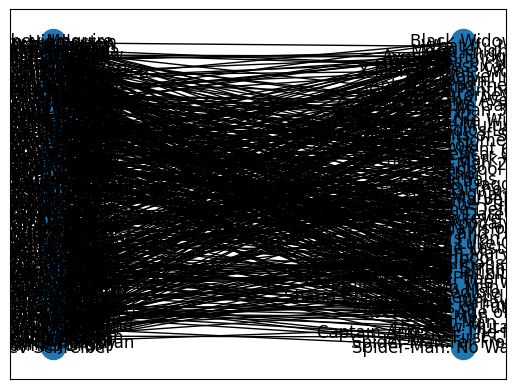

In [25]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [26]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [27]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Liev Schreiber', 'will.i.am', {'weight': 1}), ('Liev Schreiber', 'Taylor Kitsch', {'weight': 1}), ('Liev Schreiber', 'Lynn Collins', {'weight': 1}), ('Liev Schreiber', 'Ryan Reynolds', {'weight': 1}), ('Liev Schreiber', 'Hugh Jackman', {'weight': 1}), ('Liev Schreiber', 'Danny Huston', {'weight': 1}), ('Danniel Bruhl', 'Hayley Atwell', {'weight': 1}), ('Danniel Bruhl', 'Scarlett Johansson', {'weight': 1}), ('Danniel Bruhl', 'Josh Brolin', {'weight': 1}), ('Danniel Bruhl', 'Chris Hemsworth', {'weight': 1}), ('Danniel Bruhl', 'Chris Evans', {'weight': 1}), ('Danniel Bruhl', 'Paul Bettany', {'weight': 1}), ('Danniel Bruhl', 'Elizabeth Olsen', {'weight': 1}), ('Vinnie Jones', 'Famke Janssen', {'weight': 1}), ('Vinnie Jones', 'Bruce Davison', {'weight': 1}), ('Vinnie Jones', 'Stefan Kapičić', {'weight': 1}), ('Vinnie Jones', 'Julian Dennison', {'weight': 1}), ('Vinnie Jones', 'Ryan Reynolds', {'weight': 1}), ('Vinnie Jones', 'Anna Paquin', {'weight': 1}), ('Vinnie Jones', 'R

In [28]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [29]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  7

{'Liev Schreiber', 'Danniel Bruhl', 'Vinnie Jones', 'Chadwick Boseman', 'David Harbour', 'Kathryn Hahn', 'Rossario Dawson', 'Nicholas Hoult', 'Chris Patt', 'Tao Okamoto', 'Clark Gregg', 'Leslie Uggams', 'Brianna Hildebrand', 'Evan Peters', 'Andrew Garfield', 'Meng’er Zhang', 'Ben Kingsley', 'Alfre Woodard', 'Ben Mendelsohn', 'Jake Gyllenhaal', "James D'Arcy", 'Hugh Jackman', 'Michael Douglas', 'Sophia Di Martino', 'Famke Janssen', 'Elisabeth Olsen', 'Mickey Rourke', 'Toby Jones', 'Jameela Jamil', 'Zendaya', 'David Tennant', 'Anna Paquin', 'Terrence Howard', 'Stephen Merchant', 'Elliot Page', "Vincent D'Onofrio", 'Bradely Cooper', 'Tatiana Maslany', 'Racheal McAdams', 'Brie Larson', 'Alexandra Shipp', 'Chris Hemsworth', 'Morena Baccarin', 'Ian McKellen', 'Allegra Acosta', 'Emily VanCamp', 'Chris Evans', 'Danial Bruhl', 'Fawad Khan', 'Iman Vellani', 'Benedict Wong', 'Enver Gjokaj', 'Bridget Regan', 'Zoe Saldana', 'Rose Byrne', 'Corey Stall', 'Iain De 